In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Read files

In [171]:
import os
from pathlib import Path

cwd = Path(os.getcwd())
resources = cwd / "resources"
df_train = pd.read_csv(resources/"train.csv", index_col=0)
# results_col = df_train.columns[0]
# df_results = df_train[results_col].copy()
# df_train = df_train[df_train.columns[1:]]
df_test = pd.read_csv(resources/"test.csv", index_col=0)


## Explore data

In [172]:
df_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [173]:
df_test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


<Axes: ylabel='PassengerId'>

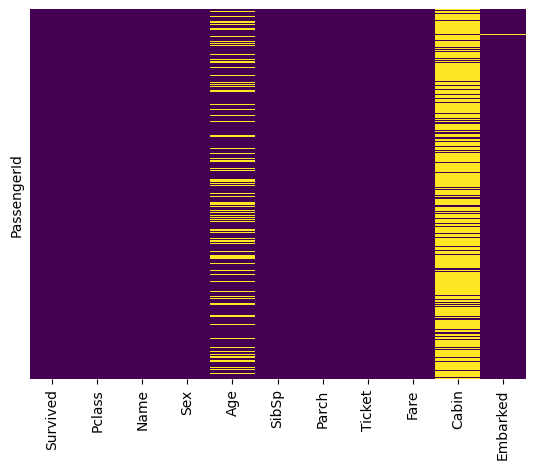

In [174]:
sns.heatmap(df_train.isnull(), cbar=False, cmap="viridis", yticklabels="")

#### Fill missing values for `age`, using median as estimator

In [175]:
df_explore_age = df_train[["Age", "Fare", "Pclass"]]
df_explore_age

,Age,Fare,Pclass
PassengerId,,,
1,22.0,7.2500,3
2,38.0,71.2833,1
3,26.0,7.9250,3
4,35.0,53.1000,1
5,35.0,8.0500,3
...,...,...,...
887,27.0,13.0000,2
888,19.0,30.0000,1
889,NaN,23.4500,3


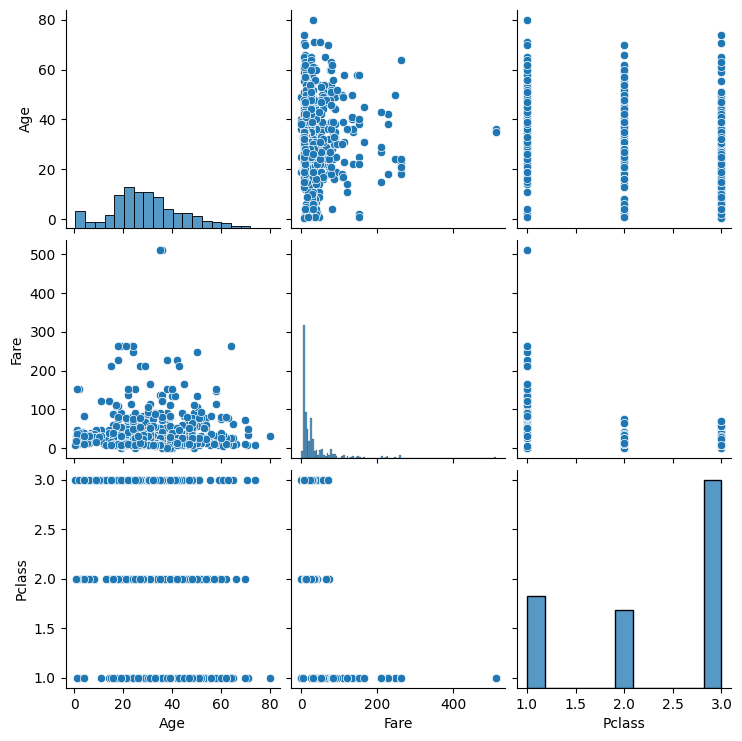

In [176]:
sns.pairplot(df_explore_age)

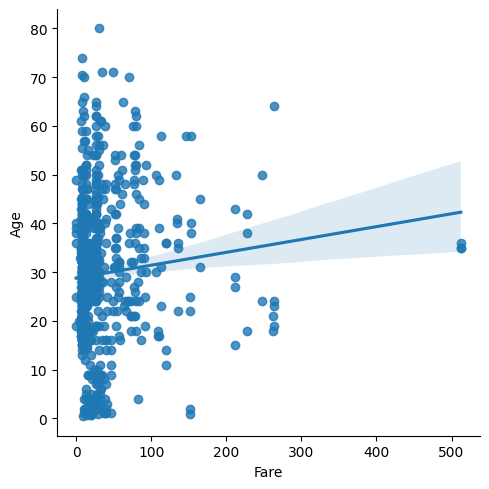

In [177]:
sns.lmplot(df_explore_age, x="Fare", y="Age")
# Poor correlation between age and fare

<Axes: xlabel='Pclass', ylabel='Age'>

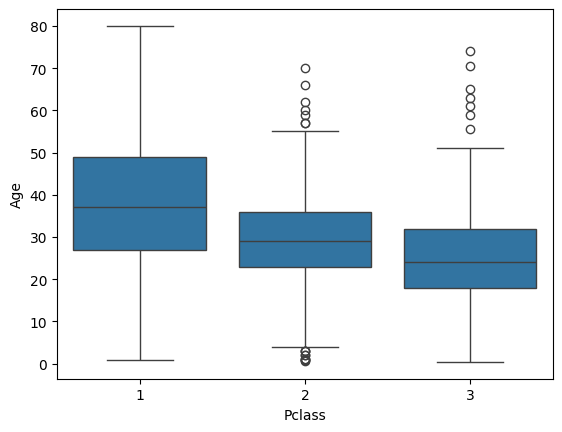

In [178]:
sns.boxplot(df_explore_age, x="Pclass", y="Age")

- Noted that correlation between fare and age is poor
- There might be some categorical correlation between Pclass and age 
- It is still reasonable to perform a linear regression based on these 2 factors


In [179]:
from sklearn.linear_model import LinearRegression

df_train_age = df_train[["Age", "Fare", "Pclass"]].dropna(how="any")
df_test_age = df_test[["Age", "Fare", "Pclass"]].dropna(how="any")
X_train = df_train_age[["Fare", "Pclass"]]
y_train = df_train_age["Age"]
X_test = df_test_age[["Fare", "Pclass"]]
y_test = df_test_age["Age"]

lm = LinearRegression()
lm.fit(X_train, y_train)
print(f"LinearFit Coefficients: \n {lm.coef_}")


def predict_age(pds: pd.Series):
    age = pds.loc["Age"]
    fare = pds.loc["Fare"]
    pclass = pds.loc["Pclass"]
    if pd.isnull(age):
        dfinput = pd.DataFrame([{"Fare": fare, "Pclass": pclass}])
        res = lm.predict(dfinput)
        return round(res[0])
    else:
        return age


print(f">> age prediction function loaded")

LinearFit Coefficients: 
 [-0.04300591 -7.90311364]
>> age prediction function loaded


### Clean up data
- Fill missing age values with LinearRegressionModel
- Remove Cabin: Too much missing data
- Remove embarked: location of where embarked is unlikely to have effect

In [180]:
df_train["Age"] = df_train[["Age", "Fare", "Pclass"]].apply(predict_age, axis=1)
df_test["Age"] = df_test[["Age", "Fare", "Pclass"]].apply(predict_age, axis=1)

In [181]:
df_train.drop(labels=["Cabin"], axis=1, inplace=True)
df_test.drop(labels=["Cabin"], axis=1, inplace=True)

<Axes: ylabel='PassengerId'>

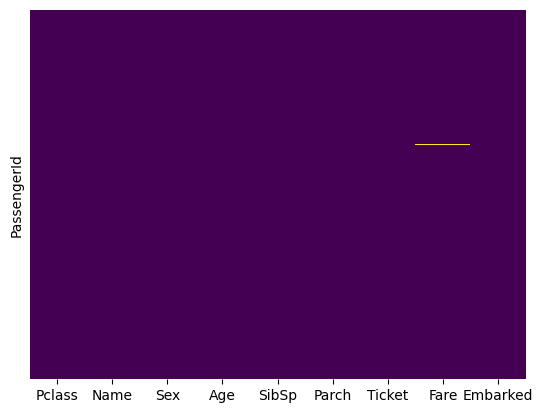

In [182]:
sns.heatmap(df_test.isnull(), cbar=False, cmap="viridis", yticklabels="")

<Axes: ylabel='PassengerId'>

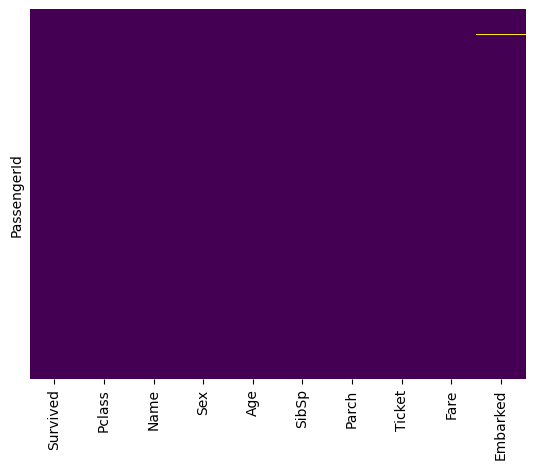

In [183]:
sns.heatmap(df_train.isnull(), cbar=False, cmap="viridis", yticklabels="")

Since there is only a few NaN, let's fill them randomly

In [184]:
for col in ["Embarked", "Fare"]:
    df_train[col].bfill(inplace=True)
    df_test[col].bfill(inplace=True)



<Axes: ylabel='PassengerId'>

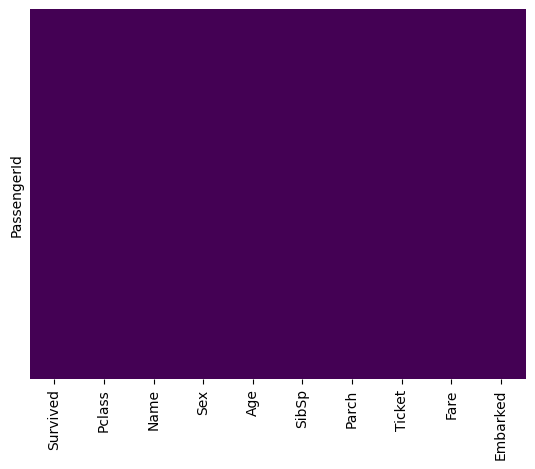

In [185]:
sns.heatmap(df_train.isnull(), cbar=False, cmap="viridis", yticklabels="")

<Axes: ylabel='PassengerId'>

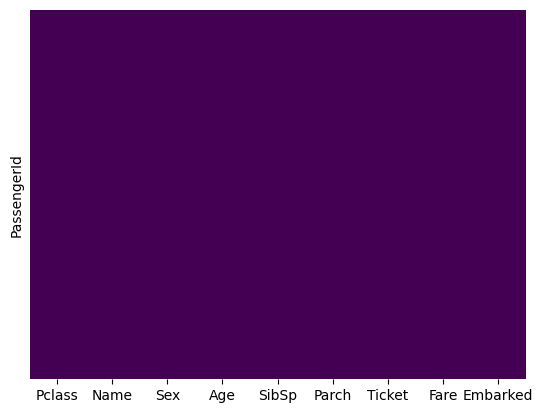

In [186]:
sns.heatmap(df_test.isnull(), cbar=False, cmap="viridis", yticklabels="")

### Change to categorical values, drop unnecessary columns

In [187]:
df_sex = pd.get_dummies(df_train["Sex"], drop_first=True)
df_embark = pd.get_dummies(df_train["Embarked"], drop_first=True)
df_train = pd.concat([df_train, df_embark, df_sex], axis=1)
df_train.drop(["Sex", "Embarked", "Name", "Ticket"], axis=1, inplace=True)
df_train

,Survived,Pclass,Age,SibSp,Parch,Fare,Q,S,male
PassengerId,,,,,,,,,
1,0,3,22.0,1,0,7.2500,False,True,True
2,1,1,38.0,1,0,71.2833,False,False,False
3,1,3,26.0,0,0,7.9250,False,True,False
4,1,1,35.0,1,0,53.1000,False,True,False
5,0,3,35.0,0,0,8.0500,False,True,True
...,...,...,...,...,...,...,...,...,...
887,0,2,27.0,0,0,13.0000,False,True,True
888,1,1,19.0,0,0,30.0000,False,True,False
889,0,3,24.0,1,2,23.4500,False,True,False


In [188]:
df_sex = pd.get_dummies(df_test["Sex"], drop_first=True)
df_embark = pd.get_dummies(df_test["Embarked"], drop_first=True)
df_test = pd.concat([df_test, df_embark, df_sex], axis=1)
df_test.drop(["Sex", "Embarked", "Name", "Ticket"], axis=1, inplace=True)
df_test

,Pclass,Age,SibSp,Parch,Fare,Q,S,male
PassengerId,,,,,,,,
892,3,34.5,0,0,7.8292,True,False,True
893,3,47.0,1,0,7.0000,False,True,False
894,2,62.0,0,0,9.6875,True,False,True
895,3,27.0,0,0,8.6625,False,True,True
896,3,22.0,1,1,12.2875,False,True,False
...,...,...,...,...,...,...,...,...
1305,3,25.0,0,0,8.0500,False,True,True
1306,1,39.0,0,0,108.9000,False,False,False
1307,3,38.5,0,0,7.2500,False,True,True


In [189]:
y_value = df_train.columns[0]
X_train = df_train[[col for col in df_train.columns if col != y_value]]
y_train = df_train[y_value]

In [190]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [191]:
df_test["Survived"] = logmodel.predict(df_test)
df_test

,Pclass,Age,SibSp,Parch,Fare,Q,S,male,Survived
PassengerId,,,,,,,,,
892,3,34.5,0,0,7.8292,True,False,True,0
893,3,47.0,1,0,7.0000,False,True,False,0
894,2,62.0,0,0,9.6875,True,False,True,0
895,3,27.0,0,0,8.6625,False,True,True,0
896,3,22.0,1,1,12.2875,False,True,False,1
...,...,...,...,...,...,...,...,...,...
1305,3,25.0,0,0,8.0500,False,True,True,0
1306,1,39.0,0,0,108.9000,False,False,False,1
1307,3,38.5,0,0,7.2500,False,True,True,0


In [192]:
df_test[["Survived"]].to_csv("submission.csv")